In [55]:
import warnings
warnings.filterwarnings('ignore') 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [2]:
train_ds=keras.utils.image_dataset_from_directory(
     directory="train",
     labels="inferred",
     label_mode="int",
     batch_size=32,
     image_size=(256, 256),
    )
validation_ds=keras.utils.image_dataset_from_directory(
     directory="train",
     labels="inferred",
     label_mode="int",
     batch_size=32,
     image_size=(256, 256),
    )

Found 2637 files belonging to 2 classes.
Found 2637 files belonging to 2 classes.


In [3]:
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [4]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Jeddah Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
history=model.fit(train_ds,epochs=2,validation_data=validation_ds)

Epoch 1/2
83/83 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.6142 - loss: 0.9488 - val_accuracy: 0.7907 - val_loss: 0.4104
Epoch 2/2
83/83 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.7806 - loss: 0.4577 - val_accuracy: 0.8020 - val_loss: 0.3873


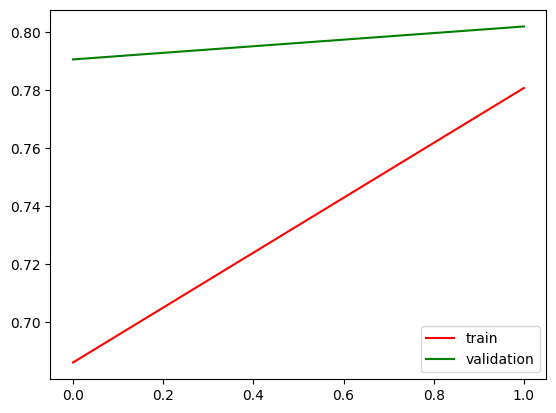

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

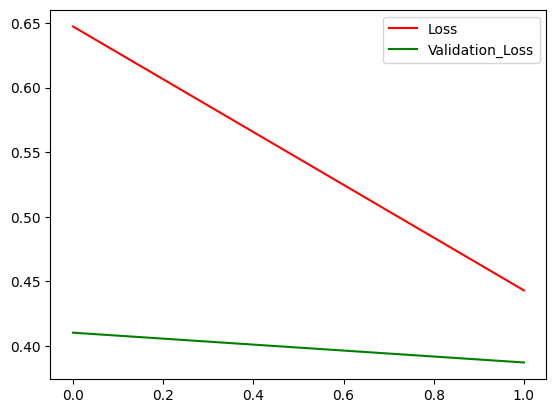

In [9]:
plt.plot(history.history['loss'],color='red',label='Loss')
plt.plot(history.history['val_loss'],color='green',label='Validation_Loss')
plt.legend()
plt.show()

In [10]:
import cv2

In [44]:
test_image=cv2.imread('download.jpg')

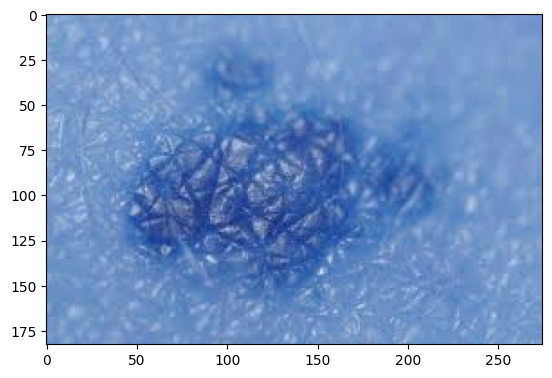

In [45]:
plt.imshow(test_image)

In [46]:
test_image.shape

(183, 275, 3)

In [47]:
test_image=cv2.resize(test_image,(256,256))

In [48]:
test_input=test_image.reshape((1,256,256,3))

In [49]:
arr=model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [50]:
if (round(arr[0][0],0)==0):
    print("Benign")
elif(round(arr[0][0],0)==1):
    print("malignant")

malignant


In [51]:
model.save("Skin_Cancer_Detector.h5")

In [52]:
new_model=keras.models.load_model("Skin_Cancer_Detector.h5")

In [54]:
new_model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


array([[1.]], dtype=float32)

In [57]:
json_string=model.to_json()
with open("skin_cancer_json",'w')as f:
    f.write(json_string)